In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline

In [11]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
d = pd.read_csv('bank_marketing_data_feature_engineered.csv')

In [5]:
d.shape

(41084, 15)

In [15]:
d.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'cons_conf_idx', 'euribor_3_month',
       'deposit', 'age_bucket', 'previous_campaign'],
      dtype='object')

In [248]:
#### Passing all features to random forest to get feature importance from it.

In [6]:
c=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'cons_conf_idx', 'euribor_3_month', 'age_bucket', 'previous_campaign']

In [7]:
X = d[c]

In [8]:
X.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'cons_conf_idx', 'euribor_3_month',
       'age_bucket', 'previous_campaign'],
      dtype='object')

In [9]:
y = d.deposit

In [10]:
X.shape

(41084, 14)

In [11]:
y.shape

(41084,)

In [145]:
##Also, converting to Standard Scalar

In [12]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
#### Feature selection using random forest feature importance:
rf = RandomForestClassifier()
rf.fit(Xs, y)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
importances = rf.feature_importances_
importances

array([0.12973701, 0.05222397, 0.06251867, 0.01837024, 0.04716874,
       0.0323322 , 0.01545559, 0.03762387, 0.07516146, 0.11725044,
       0.10087923, 0.22125333, 0.06519042, 0.02483482])

In [15]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False)

,importance
euribor_3_month,0.221253
job,0.129737
campaign,0.117250
cons_conf_idx,0.100879
day_of_week,0.075161
age_bucket,0.065190
education,0.062519
marital,0.052224
housing,0.047169
month,0.037624


In [ ]:
##taking top features from feature importance in random forest

In [87]:
c = ['euribor_3_month', 'day_of_week', 'marital', 'housing', 'education', 'age_bucket', 'job', 'month', 'campaign', 'cons_conf_idx']

In [88]:
X = d[c]

In [89]:
X.columns

Index(['euribor_3_month', 'day_of_week', 'marital', 'housing', 'education',
       'age_bucket', 'job', 'month', 'campaign', 'cons_conf_idx'],
      dtype='object')

In [90]:
y = d.deposit

In [91]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33, random_state=42, stratify =y)

In [98]:
print("Number Of Observations X_train dataset: ", X_train.shape)
print("Number Of Observations y_train dataset: ", y_train.shape)
print("Number Of Observations X_test dataset: ", X_test.shape)
print("Number Of Observations y_test dataset: ", y_test.shape)

Number Of Observations X_train dataset:  (27526, 10)
Number Of Observations y_train dataset:  (27526,)
Number Of Observations X_test dataset:  (13558, 10)
Number Of Observations y_test dataset:  (13558,)


In [99]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 3109
Before OverSampling, counts of label '0': 24417 



In [ ]:
##Over sampling using SMOTE

In [100]:
sm = SMOTE(random_state=2)
X_train_resample, y_train_resample = sm.fit_sample(X_train, y_train.ravel())

In [101]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_resample.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resample.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resample==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resample==0)))

After OverSampling, the shape of train_X: (48834, 10)
After OverSampling, the shape of train_y: (48834,) 

After OverSampling, counts of label '1': 24417
After OverSampling, counts of label '0': 24417


In [ ]:
####Now, the data is balanced and the baseline i 50:50

In [102]:
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_resample, y_train_resample.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.8s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    4.4s finished
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [104]:
clf.best_params_

{'C': 1.0}

In [28]:
clf.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Trying out Classification models

In [105]:
lr = LogisticRegression(C=1, verbose=0)
lr.fit(X_train_resample, y_train_resample.ravel())

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [106]:
cross_val_score(lr, X_train_resample, y_train_resample, cv =5)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.70556921, 0.71795659, 0.71308622, 0.70939996, 0.708376  ])

In [107]:
lr.fit(X_train_resample, y_train_resample)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [108]:
yhat = lr.predict(X_test)

In [109]:
print(confusion_matrix(y_test, yhat))

[[8744 3283]
 [ 431 1100]]


In [110]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82     12027
           1       0.25      0.72      0.37      1531

   micro avg       0.73      0.73      0.73     13558
   macro avg       0.60      0.72      0.60     13558
weighted avg       0.87      0.73      0.77     13558



In [111]:
lr.score(X_test, y_test)

0.7260657914146629

In [112]:
tmp = lr.fit(X_train_resample, y_train_resample)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [113]:
##Function to plot confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset: 71.84846505551927%


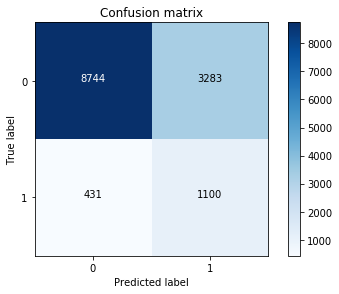

In [114]:
y_hat = lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_hat)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

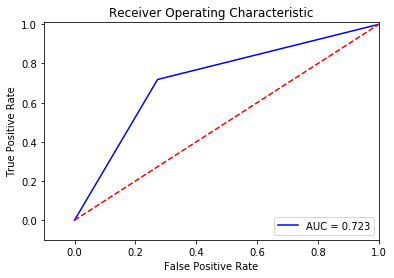

In [115]:
## Plotting roc curve using predictions
fpr, tpr, thresholds = roc_curve(y_test, yhat)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

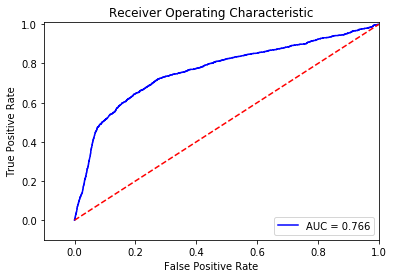

In [116]:
#Plotting ROC curve using score for the target
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
## Thats a good AUC score of 0.770

In [ ]:
##Random FOrest model

In [117]:
rf1 = RandomForestClassifier(n_estimators=100)

In [118]:
rf1.fit(X_train_resample, y_train_resample)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
cross_val_score(rf1, X_train_resample, y_train_resample, cv = 5)

array([0.78880016, 0.96478296, 0.96190866, 0.96385419, 0.96067991])

In [120]:
yhatr = rf1.predict(X_test)

In [121]:
rf1.score(X_test,y_test)

0.8749078035108423

In [122]:
confusion_matrix(y_test, yhatr)

array([[11317,   710],
       [  986,   545]], dtype=int64)

In [123]:
print(classification_report(y_test, yhatr))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     12027
           1       0.43      0.36      0.39      1531

   micro avg       0.87      0.87      0.87     13558
   macro avg       0.68      0.65      0.66     13558
weighted avg       0.87      0.87      0.87     13558



In [125]:
pr = rf1.predict_proba(X_test)

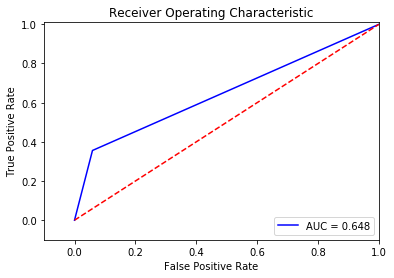

In [127]:
fpr, tpr, thresholds = roc_curve(y_test, yhatr)

roc_auc = auc(fpr,tpr)


# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [128]:
from xgboost import XGBClassifier

In [129]:
xg = XGBClassifier(n_estimators=100)

In [130]:
cross_val_score(xg, X_train_resample, y_train_resample, cv = 5)

array([0.75726863, 0.92905405, 0.92340774, 0.92555806, 0.92013107])

In [131]:
mdl = xg.fit( X_train_resample, y_train_resample)

In [132]:
yhatx = mdl.predict(X_test)

In [133]:
xg.score(X_test, y_test)

0.879111963416433

In [134]:
confusion_matrix(y_test, yhatx)

array([[11152,   875],
       [  764,   767]], dtype=int64)

In [135]:
print(classification_report(y_test, yhatx))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     12027
           1       0.47      0.50      0.48      1531

   micro avg       0.88      0.88      0.88     13558
   macro avg       0.70      0.71      0.71     13558
weighted avg       0.88      0.88      0.88     13558



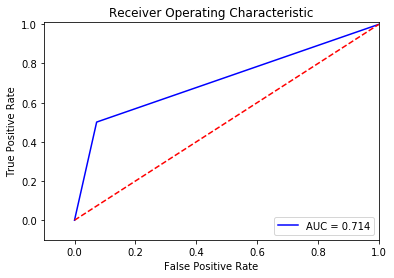

In [136]:
fpr, tpr, thresholds = roc_curve(y_test, yhatx)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [137]:
knn = KNeighborsClassifier()
cross_val_score(knn, X_train_resample, y_train_resample, cv =5)

array([0.84326372, 0.86332924, 0.85725988, 0.85541675, 0.8542904 ])

In [138]:
knn.fit(X_train_resample, y_train_resample)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [139]:
knn.score(X_test, y_test)

0.769139991149137

In [140]:
yhatk = knn.predict(X_test)

In [141]:
confusion_matrix(y_test, yhatk)

array([[9603, 2424],
       [ 706,  825]], dtype=int64)

In [142]:
print(classification_report(y_test, yhatk))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     12027
           1       0.25      0.54      0.35      1531

   micro avg       0.77      0.77      0.77     13558
   macro avg       0.59      0.67      0.60     13558
weighted avg       0.86      0.77      0.80     13558



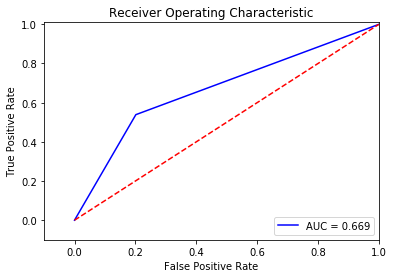

In [143]:
fpr, tpr, thresholds = roc_curve(y_test, yhatk)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [144]:
sv = LinearSVC()

In [145]:
cross_val_score(sv, X_train_resample, y_train_resample, cv =10)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

array([0.70597871, 0.70597871, 0.73218673, 0.70700246, 0.71089271,
       0.71539722, 0.69963145, 0.71896764, 0.70647276, 0.71364195])

In [146]:
sv.fit(X_train_resample, y_train_resample)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [147]:
yhatc = sv.predict(X_test)

In [148]:
sv.score(X_test, y_test)

0.7249594335447707

In [149]:
confusion_matrix(y_test, yhatc)

array([[8724, 3303],
       [ 426, 1105]], dtype=int64)

In [150]:
print(classification_report(y_test, yhatc))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82     12027
           1       0.25      0.72      0.37      1531

   micro avg       0.72      0.72      0.72     13558
   macro avg       0.60      0.72      0.60     13558
weighted avg       0.87      0.72      0.77     13558



Recall metric in the testing dataset: 71.84846505551927%


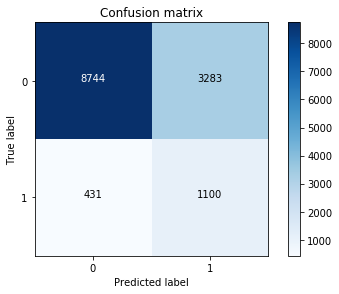

In [151]:
y_hatc = sv.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_hat)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [152]:
score_pred_y = sv.decision_function(X_test)

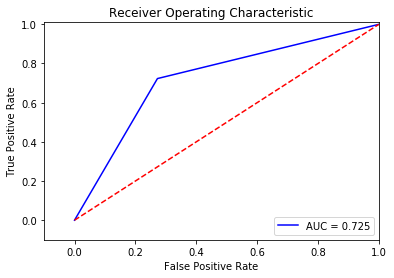

In [76]:
# fpr, tpr, thresholds = roc_curve(y_test, yhatc)

# roc_auc = auc(fpr,tpr)

# # Plot ROC
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
# plt.legend(loc='lower right')
# plt.plot([0,1],[0,1],'r--')
# plt.xlim([-0.1,1.0])
# plt.ylim([-0.1,1.01])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

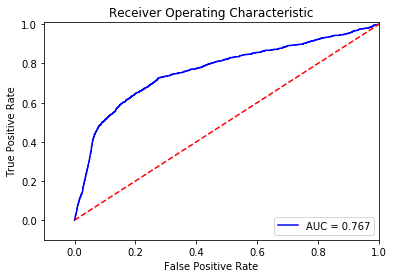

In [153]:
fpr, tpr, thresholds = roc_curve(y_test, score_pred_y)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
## Grid search find best parameters for Linear SVC

In [157]:
sgd_cls_params = {
    'loss':['hinge', 'squared_hinge'],
    'penalty':['l2'],
    
}

sgd_cls = LinearSVC()
sgd_cls_gs = GridSearchCV(sgd_cls, sgd_cls_params, cv=5, verbose=1)

In [158]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [159]:
sgd_cls_gs.fit(Xs, y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear faile

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'loss': ['hinge', 'squared_hinge'], 'penalty': ['l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [160]:
print(sgd_cls_gs.best_params_)
print(sgd_cls_gs.best_score_)
sgd_cls = sgd_cls_gs.best_estimator_

{'loss': 'hinge', 'penalty': 'l2'}
0.8542985103690001


In [204]:
c = ['euribor_3_month', 'day_of_week', 'marital', 'housing', 'education', 'age_bucket', 'job', 'campaign', 'cons_conf_idx', 'contact']

In [205]:
X = d[c]

In [206]:
X.columns

Index(['euribor_3_month', 'day_of_week', 'marital', 'housing', 'education',
       'age_bucket', 'job', 'campaign', 'cons_conf_idx', 'contact'],
      dtype='object')

In [207]:
Xs = ss.fit_transform(X)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [208]:
y = d.deposit

In [209]:
X.columns

Index(['euribor_3_month', 'day_of_week', 'marital', 'housing', 'education',
       'age_bucket', 'job', 'campaign', 'cons_conf_idx', 'contact'],
      dtype='object')

In [388]:
# value_coefs = pd.DataFrame({'coef':sgd_cls.coef_, 'mag':np.abs(sgd_cls.coef_),
#                            'pred': X.columns})
# value_coefs.sort_values('mag', ascending=False, inplace=True)
# value_coefs.iloc[0:10, :]

In [212]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.33, random_state = 42, stratify =y)

In [213]:
print("Number Of Observations X_train dataset: ", X_train.shape)
print("Number Of Observations y_train dataset: ", y_train.shape)
print("Number Of Observations X_test dataset: ", X_test.shape)
print("Number Of Observations y_test dataset: ", y_test.shape)

Number Of Observations X_train dataset:  (27526, 10)
Number Of Observations y_train dataset:  (27526,)
Number Of Observations X_test dataset:  (13558, 10)
Number Of Observations y_test dataset:  (13558,)


In [214]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 3109
Before OverSampling, counts of label '0': 24417 



In [ ]:
##Over sampling using SMOTE

In [215]:
sm = SMOTE(random_state=2)
X_train_resample, y_train_resample = sm.fit_sample(X_train, y_train.ravel())

In [216]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_resample.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resample.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resample==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resample==0)))

After OverSampling, the shape of train_X: (48834, 10)
After OverSampling, the shape of train_y: (48834,) 

After OverSampling, counts of label '1': 24417
After OverSampling, counts of label '0': 24417


In [217]:
lgf = LogisticRegression(class_weight='balanced')

In [218]:
lgf.fit(X_train_resample, y_train_resample)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [219]:
y_pred = lgf.predict(X_test)

In [220]:
lgf.score(X_test, y_test)

0.7311550376161676

In [221]:
confusion_matrix(y_test, y_pred)

array([[8815, 3212],
       [ 433, 1098]], dtype=int64)

Recall metric in the testing dataset: 71.71783148269105%


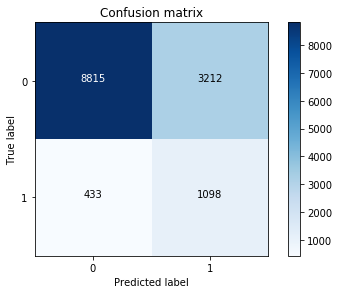

In [222]:
y_pred = lgf.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [223]:
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83     12027
           1       0.25      0.72      0.38      1531

   micro avg       0.73      0.73      0.73     13558
   macro avg       0.60      0.73      0.60     13558
weighted avg       0.87      0.73      0.78     13558



In [224]:
y_p_score = lgf.decision_function(X_test)

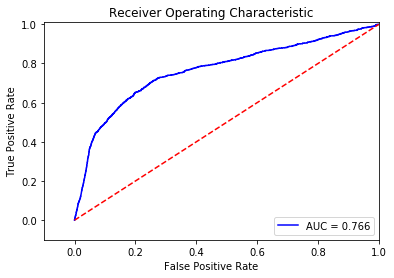

In [225]:
fpr, tpr, thresholds = roc_curve(y_test, y_p_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
##Using the parameters from grid search doing the SVC model

In [226]:
svl = LinearSVC(loss = 'hinge', class_weight='balanced')

In [228]:
svl.fit(X_train_resample, y_train_resample)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [229]:
yharsv = svl.predict(X_test)

In [230]:
svl.score(X_test, y_test)

0.7247381619707921

In [231]:
svl_scores = cross_val_score(svl, X_train_resample, y_train_resample, cv =10)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

In [232]:
print(np.mean(svl_scores))

0.7118811653633448


In [233]:
confusion_matrix(y_test, yharsv)

array([[8713, 3314],
       [ 418, 1113]], dtype=int64)

In [234]:
print(classification_report(y_test, yharsv))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     12027
           1       0.25      0.73      0.37      1531

   micro avg       0.72      0.72      0.72     13558
   macro avg       0.60      0.73      0.60     13558
weighted avg       0.87      0.72      0.77     13558



Recall metric in the train dataset: 72.69758327890268%


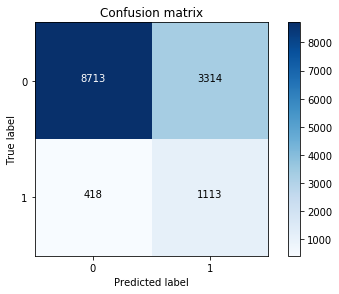

In [235]:
yharsv = svl.predict(X_test)

cnf_matrix_tra = confusion_matrix(y_test, yharsv)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [236]:
score_pred_svl = svl.decision_function(X_test)

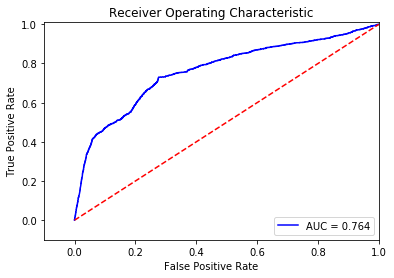

In [238]:
fpr, tpr, thresholds = roc_curve(y_test, score_pred_svl)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#### Checking Linear SVC model in original train test set:

In [239]:
lsv = LinearSVC(loss = 'hinge', class_weight='balanced')

In [240]:
lsv.fit(X_train, y_train)

C:\Users\r_ani\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [241]:
y_pred_lsv = lsv.predict(X_test)

In [242]:
lsv.score(X_test, y_test)

0.7247381619707921

In [243]:
y_pred_samp_score_lsv = lsv.decision_function(X_test)

In [244]:
confusion_matrix(y_test, y_pred_lsv)

array([[8713, 3314],
       [ 418, 1113]], dtype=int64)

In [245]:
print(classification_report(y_test, y_pred_lsv))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     12027
           1       0.25      0.73      0.37      1531

   micro avg       0.72      0.72      0.72     13558
   macro avg       0.60      0.73      0.60     13558
weighted avg       0.87      0.72      0.77     13558



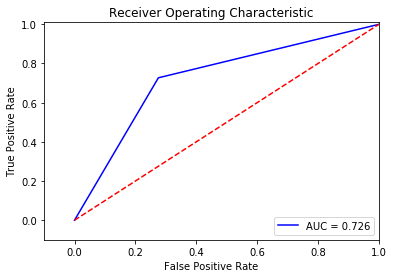

In [246]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lsv)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [202]:
score_pred_y = lsv.decision_function(X_test)

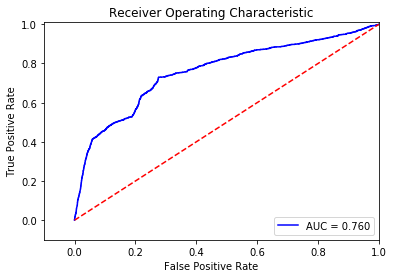

In [247]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_samp_score_lsv)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Most of the model shows slight difference in the confusion matrix, which indicates there are variables which are highly predictive


In [ ]:
# Precision ( True Positives divided by Total Predicted Positives)

# Recall (True Positives divided by Total Actual Positives)

# f1-score ( 2 * (precision * recall) / (precision + recall) )

# Support -  Number of True Values in said class


#### Conclusion & Bonus

#### 1. We can observe subtle differences in the confusion matrix, but overall classification reports are identical.  

#### 2. This leads us to believe that there variables that are highly  predictive of specific classes.
#### 3. This model has limitations, can be improved if more data and features are available
#### 4. I am planning to use Adaboosting RUS SMOTE and other techniques for over sampling and then try the model
#### 5. I prefer to do over sampling to under sampling so that the information and pattern in other class is not lost

#### This model can be used by any domain where they do marketing campaigns
#### Using pipeline it can be deployed in CRM, where the dataset from CRM is directly fed in to the model and the model will predict 
#### the potential customers or target for the next marketing campaign.